In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("../data/student-mat.csv", sep=";")


In [4]:
print(df.head())
print(df.shape)


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
(395, 33)


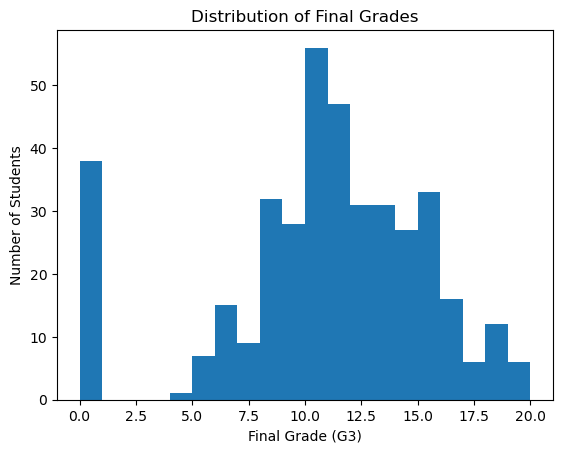

In [5]:
plt.hist(df["G3"], bins=20)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades")
plt.show()


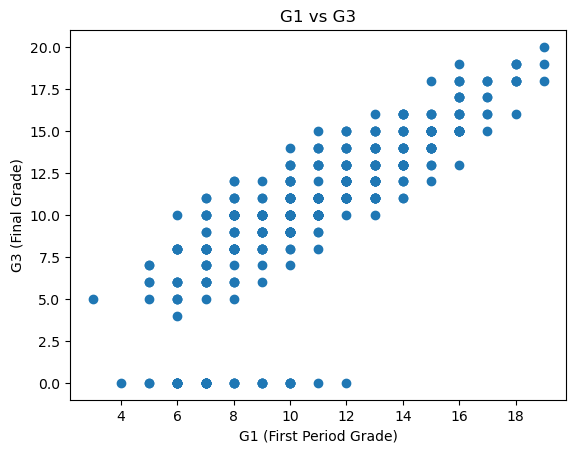

In [6]:
plt.scatter(df["G1"], df["G3"])
plt.xlabel("G1 (First Period Grade)")
plt.ylabel("G3 (Final Grade)")
plt.title("G1 vs G3")
plt.show()


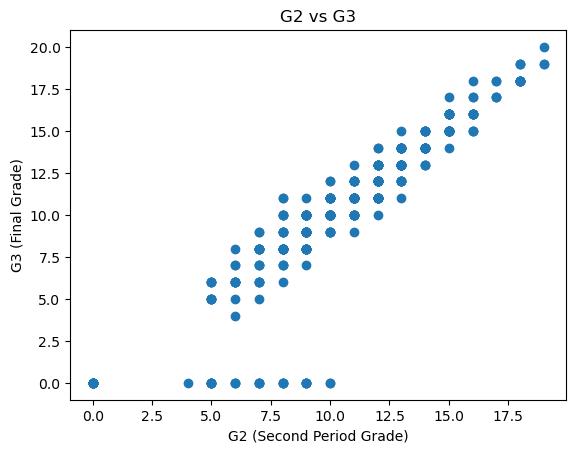

In [7]:
plt.scatter(df["G2"], df["G3"])
plt.xlabel("G2 (Second Period Grade)")
plt.ylabel("G3 (Final Grade)")
plt.title("G2 vs G3")
plt.show()


In [8]:
df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes


In [9]:
corr = df_encoded.corr()["G3"].sort_values(ascending=False)
corr.head(10)


G3         1.000000
G2         0.904868
G1         0.801468
Medu       0.217147
higher     0.182465
Fedu       0.152457
reason     0.121994
address    0.105756
sex        0.103456
Mjob       0.102082
Name: G3, dtype: float64

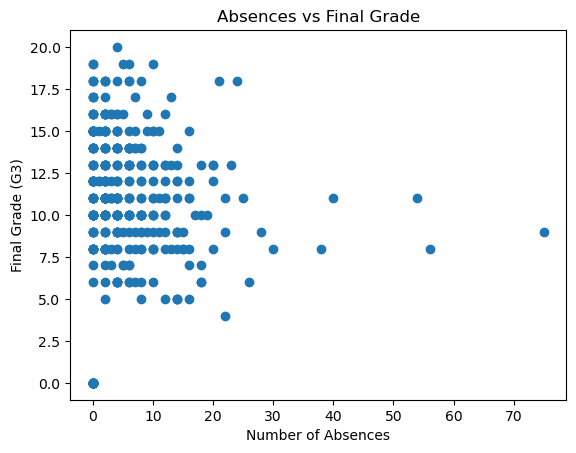

In [10]:
plt.scatter(df["absences"], df["G3"])
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade (G3)")
plt.title("Absences vs Final Grade")
plt.show()


In [11]:
X = df_encoded.drop("G3", axis=1)
y = df_encoded["G3"]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [13]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(
    max_depth=5,       
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [14]:
y_pred = dt_model.predict(X_test)


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Decision Tree RMSE:", rmse)
print("Decision Tree R² Score:", r2)


Decision Tree RMSE: 2.3442077792664544
Decision Tree R² Score: 0.732002075365532


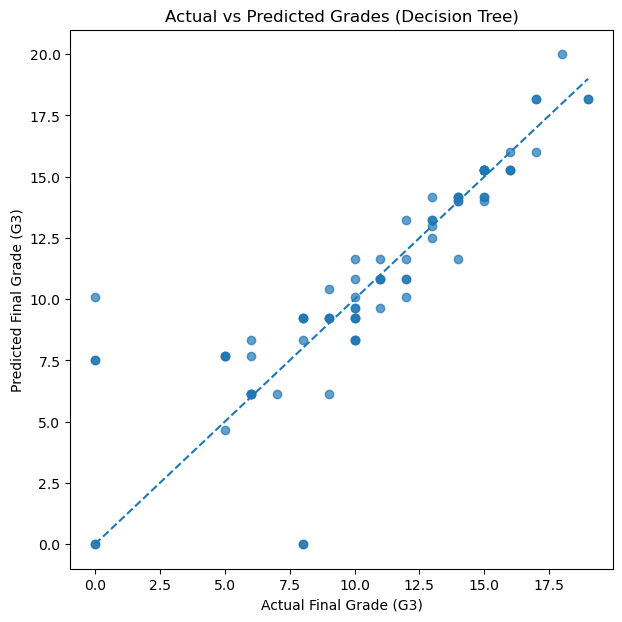

In [16]:
plt.figure(figsize=(7, 7))

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.xlabel("Actual Final Grade (G3)")
plt.ylabel("Predicted Final Grade (G3)")
plt.title("Actual vs Predicted Grades (Decision Tree)")

plt.show()
